# Weather vs Windproduction

## importing packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading data


In [14]:
df_production = pd.read_csv('../data/ProductionData/cleaned_energie_opwek.csv')
df_production 

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,124800,0.3
1,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,129075,0.3
2,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,131025,0.3
3,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,130800,0.3
4,2021-01-01 04:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,435500,435500,0.558333,130650,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
236506,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,0,0.0
236507,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,0,0.0
236508,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,0,0.0
236509,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,0,0.0


In [15]:
df_weather = pd.read_csv('../data/Weather/WeatherDataCleaned.csv')
df_weather

,Datetime,Station,WindDirection,WindSpeedAvg60min,WindSpeedAvg10min,WindGust,Temperature,DewPoint,Sunshineperhour,GlobalRadiation,...,CloudCover,RelativeAtmosphericHumidity,IndicatorWeatherCode,Fog,Rain,Snow,Thunder,IceFormation,AvgDailyTemperature,TemperatureAvgMonthlyTemperature
0,2021-01-01 00:00:00,260,230,10,10,20,-2.5,-26,0,0,...,0,98,7,1,0,0,0,1,2.970833,3.376747
1,2021-01-01 01:00:00,260,230,10,10,20,-3.2,-34,0,0,...,1,98,7,1,0,0,0,1,2.970833,3.376747
2,2021-01-01 02:00:00,260,230,20,20,30,-2.7,-29,0,0,...,7,98,7,1,0,0,0,1,2.970833,3.376747
3,2021-01-01 03:00:00,260,220,20,20,30,-1.1,-14,0,0,...,8,98,7,1,0,0,0,1,2.970833,3.376747
4,2021-01-01 04:00:00,260,230,20,20,40,1.1,5,0,0,...,8,95,7,0,0,0,0,0,2.970833,3.376747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,260,200,80,70,140,8.6,50,0,0,...,8,77,7,0,1,0,0,0,8.829167,6.888441
26276,2023-12-31 20:00:00,260,200,70,70,150,8.2,56,0,0,...,8,84,7,0,1,0,0,0,8.829167,6.888441
26277,2023-12-31 21:00:00,260,200,70,70,140,8.1,56,0,0,...,8,84,7,0,1,0,0,0,8.829167,6.888441
26278,2023-12-31 22:00:00,260,210,80,80,150,8.6,50,0,0,...,8,78,7,0,1,0,0,0,8.829167,6.888441


## combining data


first we will combine the two dataframes into one dataframe

In [16]:
# Convert datetime columns to datetime type
df_production['datetime'] = pd.to_datetime(df_production['datetime'])
df_weather['Datetime'] = pd.to_datetime(df_weather['Datetime'])

# Merge the dataframes on the datetime column
df_combined = pd.merge(df_production, df_weather, left_on='datetime', right_on='Datetime')

# Drop the redundant 'Datetime' column
df_combined.drop(columns=['Datetime'], inplace=True)

df_combined

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,...,CloudCover,RelativeAtmosphericHumidity,IndicatorWeatherCode,Fog,Rain,Snow,Thunder,IceFormation,AvgDailyTemperature,TemperatureAvgMonthlyTemperature
0,2021-01-01 00:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,416000,416000,0.533333,...,0,98,7,1,0,0,0,1,2.970833,3.376747
1,2021-01-01 01:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,430250,430250,0.551602,...,1,98,7,1,0,0,0,1,2.970833,3.376747
2,2021-01-01 02:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436750,436750,0.559936,...,7,98,7,1,0,0,0,1,2.970833,3.376747
3,2021-01-01 03:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,436000,436000,0.558974,...,8,98,7,1,0,0,0,1,2.970833,3.376747
4,2021-01-01 04:00:00,Nederland,WastePower,Hour,UTC,Providing,Current,435500,435500,0.558333,...,8,95,7,0,0,0,0,0,2.970833,3.376747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236506,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,...,8,78,7,0,1,0,0,0,8.829167,6.888441
236507,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,...,8,77,7,0,1,0,0,0,8.829167,6.888441
236508,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,...,8,84,7,0,1,0,0,0,8.829167,6.888441
236509,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,...,8,84,7,0,1,0,0,0,8.829167,6.888441


## Data analyses

selecting the data for only wind energy

In [17]:
df_filtered = df_combined[(df_combined['type'] == 'Wind') | (df_combined['type'] == 'WindOffshoreC')]
df_filtered

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,...,CloudCover,RelativeAtmosphericHumidity,IndicatorWeatherCode,Fog,Rain,Snow,Thunder,IceFormation,AvgDailyTemperature,TemperatureAvgMonthlyTemperature
131395,2021-01-01 00:00:00,Nederland,Wind,Hour,UTC,Providing,Current,95906,95906,0.026977,...,0,98,7,1,0,0,0,1,2.970833,3.376747
131396,2021-01-01 01:00:00,Nederland,Wind,Hour,UTC,Providing,Current,122117,122117,0.034349,...,1,98,7,1,0,0,0,1,2.970833,3.376747
131397,2021-01-01 02:00:00,Nederland,Wind,Hour,UTC,Providing,Current,87353,87353,0.024571,...,7,98,7,1,0,0,0,1,2.970833,3.376747
131398,2021-01-01 03:00:00,Nederland,Wind,Hour,UTC,Providing,Current,59687,59687,0.016788,...,8,98,7,1,0,0,0,1,2.970833,3.376747
131399,2021-01-01 04:00:00,Nederland,Wind,Hour,UTC,Providing,Current,53359,53359,0.015008,...,8,95,7,0,0,0,0,0,2.970833,3.376747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236506,2023-12-31 18:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3144000,3144000,1.431400,...,8,78,7,0,1,0,0,0,8.829167,6.888441
236507,2023-12-31 19:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3102250,3102250,1.412392,...,8,77,7,0,1,0,0,0,8.829167,6.888441
236508,2023-12-31 20:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3086249,3086249,1.405107,...,8,84,7,0,1,0,0,0,8.829167,6.888441
236509,2023-12-31 21:00:00,Nederland,WindOffshoreC,Hour,UTC,Providing,Current,3051749,3051749,1.389403,...,8,84,7,0,1,0,0,0,8.829167,6.888441


Looking at which columns we have now so we can see which we could drop to have a better overview for this particular part of eda. 

In [18]:
columns_list = df_filtered.columns.tolist()
print(columns_list)

['datetime', 'point', 'type', 'granularity', 'timezone', 'activity', 'classification', 'capacity', 'volume', 'percentage', 'emission', 'emissionfactor', 'Station', 'WindDirection', 'WindSpeedAvg60min', 'WindSpeedAvg10min', 'WindGust', 'Temperature', 'DewPoint', 'Sunshineperhour', 'GlobalRadiation', 'PrecipitationDuration', 'HourlyPrecipitationAmount', 'Pressure', 'HorizontalVisibility', 'CloudCover', 'RelativeAtmosphericHumidity', 'IndicatorWeatherCode', 'Fog', 'Rain', 'Snow', 'Thunder', 'IceFormation', 'AvgDailyTemperature', 'TemperatureAvgMonthlyTemperature']


dropping the columns that do not have anything to do with wind for now.

In [19]:
columns_to_keep = ['datetime', 'type', 'capacity', 'volume', 'percentage', 'emission', 'emissionfactor', 'WindDirection', 'WindSpeedAvg60min', 'WindSpeedAvg10min', 'WindGust']
df = df_filtered[columns_to_keep]
df

,datetime,type,capacity,volume,percentage,emission,emissionfactor,WindDirection,WindSpeedAvg60min,WindSpeedAvg10min,WindGust
131395,2021-01-01 00:00:00,Wind,95906,95906,0.026977,0,0.0,230,10,10,20
131396,2021-01-01 01:00:00,Wind,122117,122117,0.034349,0,0.0,230,10,10,20
131397,2021-01-01 02:00:00,Wind,87353,87353,0.024571,0,0.0,230,20,20,30
131398,2021-01-01 03:00:00,Wind,59687,59687,0.016788,0,0.0,220,20,20,30
131399,2021-01-01 04:00:00,Wind,53359,53359,0.015008,0,0.0,230,20,20,40
...,...,...,...,...,...,...,...,...,...,...,...
236506,2023-12-31 18:00:00,WindOffshoreC,3144000,3144000,1.431400,0,0.0,200,70,60,150
236507,2023-12-31 19:00:00,WindOffshoreC,3102250,3102250,1.412392,0,0.0,200,80,70,140
236508,2023-12-31 20:00:00,WindOffshoreC,3086249,3086249,1.405107,0,0.0,200,70,70,150
236509,2023-12-31 21:00:00,WindOffshoreC,3051749,3051749,1.389403,0,0.0,200,70,70,140


first plot we want to see if the seasons mean anything for the produced energy. And looking at the average wind gust for each season. 

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_22320\278603118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['datetime'].apply(get_season)
C:\Users\Marjolein\AppData\Local\Temp\ipykernel_22320\278603118.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['datetime'].dt.year


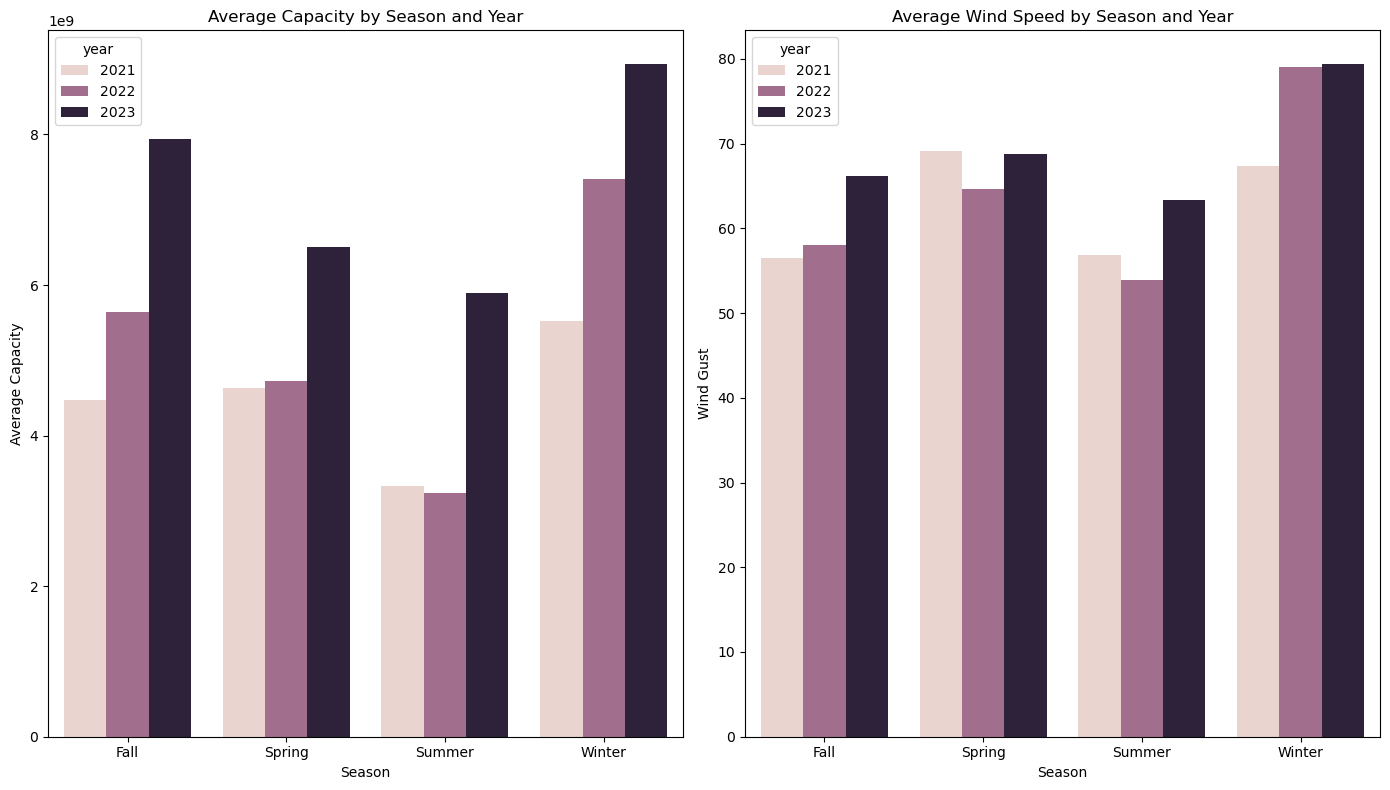

In [20]:
# Define a function to determine the season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new column 'season'
df['season'] = df['datetime'].apply(get_season)
df['year'] = df['datetime'].dt.year

# Group by year and season and calculate the mean capacity and wind speed
seasonal_data = df.groupby(['year', 'season']).agg({'capacity': 'sum', 'WindGust': 'mean'}).reset_index()

# Plot the seasonal changes in capacity and wind speed
plt.figure(figsize=(14, 8))

# Plot capacity
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='capacity', hue='year', data=seasonal_data)
plt.title('Average Capacity by Season and Year')
plt.xlabel('Season')
plt.ylabel('Average Capacity')

# Plot wind speed
plt.subplot(1, 2, 2)
sns.barplot(x='season', y='WindGust', hue='year', data=seasonal_data)
plt.title('Average Wind Speed by Season and Year')
plt.xlabel('Season')
plt.ylabel('Wind Gust')

plt.tight_layout()
plt.show()

the wind gust in this plot does not seem to correlate a lot with the capacity for different season. it is how ever only at year level so looking at it for the next part will be smaller at month level. 

C:\Users\Marjolein\AppData\Local\Temp\ipykernel_22320\4274231770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['datetime'].dt.month


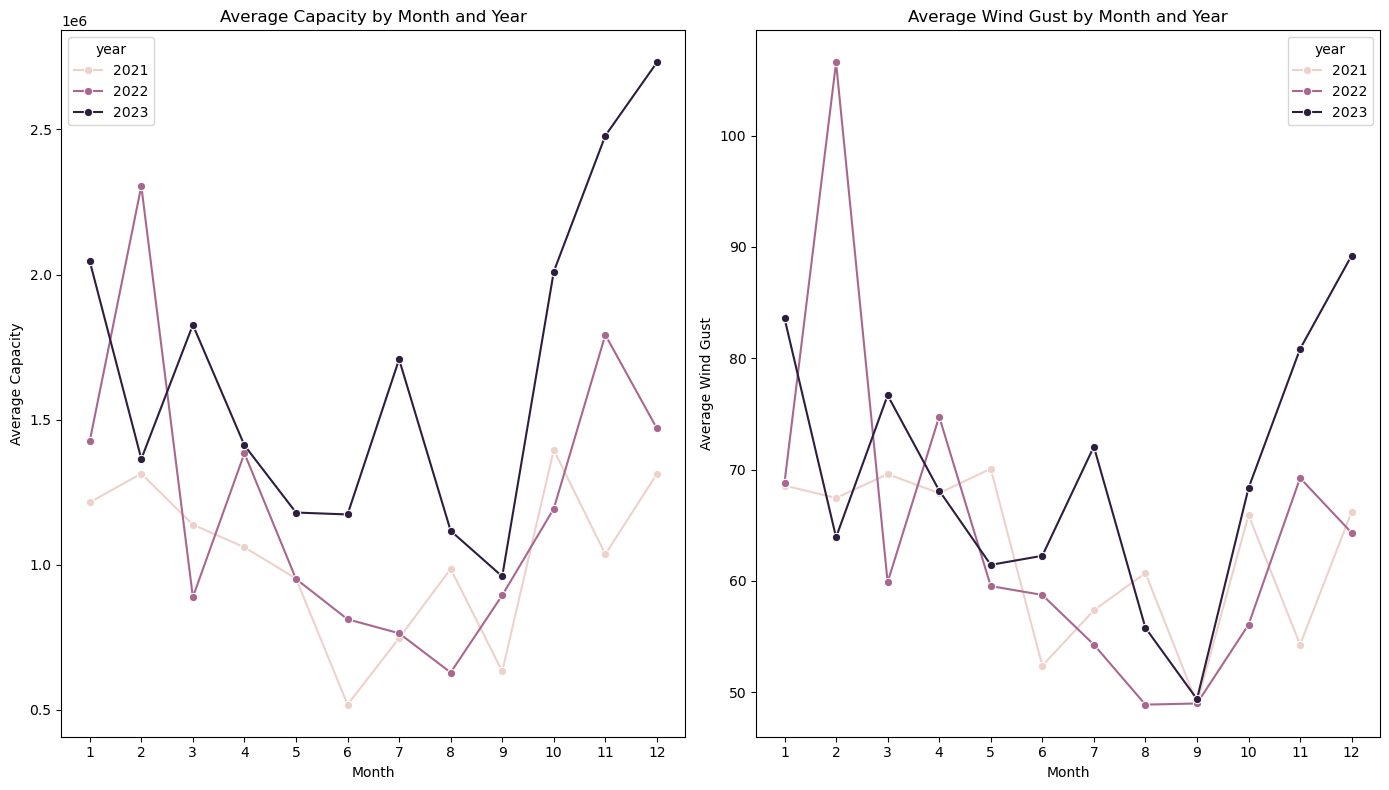

In [21]:
# Extract month from datetime
df['month'] = df['datetime'].dt.month

# Group by year and month and calculate the mean capacity and wind gust
monthly_data = df.groupby(['year', 'month']).agg({'capacity': 'mean', 'WindGust': 'mean'}).reset_index()

# Plot the monthly changes in capacity and wind gust
plt.figure(figsize=(14, 8))

# Plot capacity
plt.subplot(1, 2, 1)
sns.lineplot(x='month', y='capacity', hue='year', data=monthly_data, marker='o')
plt.title('Average Capacity by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Capacity')
plt.xticks(range(1, 13))

# Plot wind gust
plt.subplot(1, 2, 2)
sns.lineplot(x='month', y='WindGust', hue='year', data=monthly_data, marker='o')
plt.title('Average Wind Gust by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Wind Gust')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

It again seems to not really correlate, this could be do to having multiple types of wind energy production so for the next plots it will be looked at separated per type. 

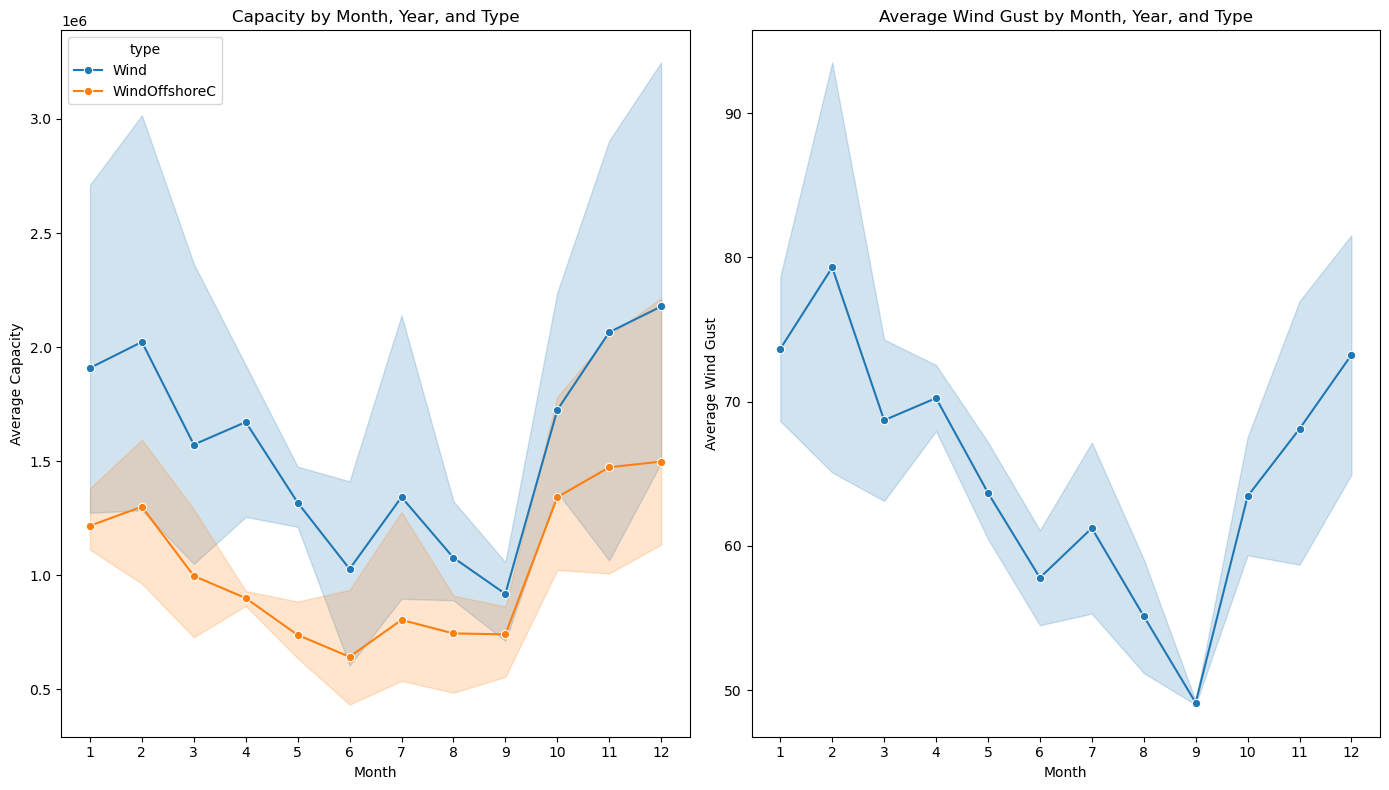

In [22]:
# Group by year, month, and type and calculate the mean capacity and wind gust
monthly_data_type = df.groupby(['year', 'month', 'type']).agg({'capacity': 'mean', 'WindGust': 'mean'}).reset_index()

# Plot the monthly changes in capacity and wind gust by type
plt.figure(figsize=(14, 8))

# Plot capacity
plt.subplot(1, 2, 1)
sns.lineplot(x='month', y='capacity', hue='type', data=monthly_data_type, marker='o')
plt.title('Capacity by Month, Year, and Type')
plt.xlabel('Month')
plt.ylabel('Average Capacity')
plt.xticks(range(1, 13))

# Plot wind gust
plt.subplot(1, 2, 2)
sns.lineplot(x='month', y='WindGust',data=monthly_data_type, marker='o')
plt.title('Average Wind Gust by Month, Year, and Type')
plt.xlabel('Month')
plt.ylabel('Average Wind Gust')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

The basic wind seems to be more corelated then the of shore wind. This could be due to the weather data being from the bilt location which is loacted in the middel of the netherlands and so not on the shore. 



In [23]:
df_filtered.to_csv('../data/Model/production_wind_data.csv', index=False)